## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

### Importing DataSet

In [2]:
Apple = pd.read_csv("AAPL.csv")
Apple

Date        Open        High         Low       Close   Adj Close  \
0     2002-11-20    0.273214    0.280357    0.272321    0.277321    0.235079   
1     2002-11-21    0.283929    0.293571    0.281250    0.291964    0.247492   
2     2002-11-22    0.287321    0.291071    0.283929    0.285893    0.242346   
3     2002-11-25    0.286250    0.288214    0.280536    0.285179    0.241740   
4     2002-11-26    0.283036    0.283929    0.272679    0.275179    0.233264   
...          ...         ...         ...         ...         ...         ...   
5280  2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003   
5281  2023-11-14  187.699997  188.110001  186.300003  187.440002  187.440002   
5282  2023-11-15  187.850006  189.500000  187.779999  188.009995  188.009995   
5283  2023-11-16  189.570007  190.960007  188.649994  189.710007  189.710007   
5284  2023-11-17  190.250000  190.380005  188.570007  189.690002  189.690002   

         Volume  
0     208740000  
1     418482400  
2     227858400  
3     199427200  
4     240262400  
...         ...  
5280   43627500  
5281   60108400  
5282   53790500  
5283   54412900  
5284   50922700  

[5285 rows x 7 columns]

<Axes: >

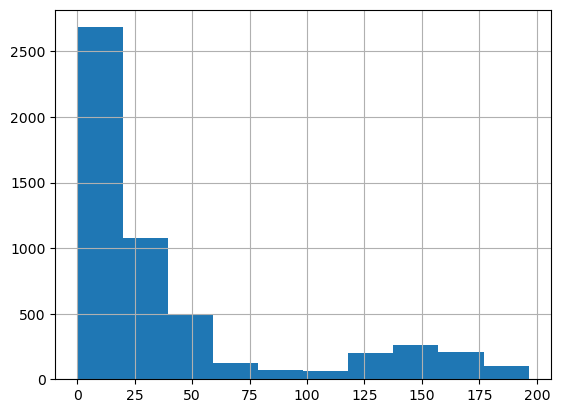

In [3]:
# Data Visualization HistoGram

Apple["Close"].hist()

In [4]:
# Data Visualization-- Plotting for Close Column

Apple_1 = px.data.stocks()
fig = px.line(Apple_1, x=Apple.index, y=Apple["Close"])
fig.update_layout(xaxis_title="Date",  # Set x-axis title
                  yaxis_title="Closing Price"  # Set y-axis title
                 )

fig.show()

## EDA

In EDA part data Cleaning, Data Transformation, Outliers Detection, Finding Duplicated Values, and Checking for NAN Values and missing Values, Feature Scaling

In [5]:
# 1.Information of Dataset using Info()

Apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5285 non-null   object 
 1   Open       5285 non-null   float64
 2   High       5285 non-null   float64
 3   Low        5285 non-null   float64
 4   Close      5285 non-null   float64
 5   Adj Close  5285 non-null   float64
 6   Volume     5285 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 289.1+ KB


In [6]:
# 2.Checking for dulpications

Apple.nunique()

Date         5285
Open         4993
High         4938
Low          4974
Close        4995
Adj Close    5105
Volume       5261
dtype: int64

In [7]:
# 3.Descriptive Analysis of Dataset Apple like Mean,Standard Deivation, Counts

Apple.describe().T

count          mean           std           min           25%  \
Open       5285.0  3.984196e+01  5.151038e+01  2.319640e-01  4.427857e+00   
High       5285.0  4.028067e+01  5.210034e+01  2.355360e-01  4.499286e+00   
Low        5285.0  3.942177e+01  5.096968e+01  2.271430e-01  4.345714e+00   
Close      5285.0  3.986961e+01  5.156218e+01  2.342860e-01  4.425000e+00   
Adj Close  5285.0  3.838704e+01  5.144191e+01  1.985990e-01  3.750983e+00   
Volume     5285.0  4.021870e+08  3.898329e+08  3.145820e+07  1.176840e+08   

                    50%           75%           max  
Open       1.928643e+01  4.495000e+01  1.962400e+02  
High       1.952607e+01  4.532250e+01  1.982300e+02  
Low        1.911750e+01  4.451250e+01  1.952800e+02  
Close      1.927786e+01  4.488750e+01  1.964500e+02  
Adj Close  1.676818e+01  4.311559e+01  1.959270e+02  
Volume     2.690072e+08  5.590704e+08  3.372970e+09

In [8]:
# 4.Checking missing value

Apple.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# 5.Checking for NAN Values in Dataset in Column Wise

Apple.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
# 6.Correlation Between Features

Apple.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999930  0.999914  0.999822   0.999650 -0.493723
High       0.999930  1.000000  0.999897  0.999915   0.999750 -0.493039
Low        0.999914  0.999897  1.000000  0.999919   0.999749 -0.494662
Close      0.999822  0.999915  0.999919  1.000000   0.999833 -0.493855
Adj Close  0.999650  0.999750  0.999749  0.999833   1.000000 -0.488603
Volume    -0.493723 -0.493039 -0.494662 -0.493855  -0.488603  1.000000

<Axes: >

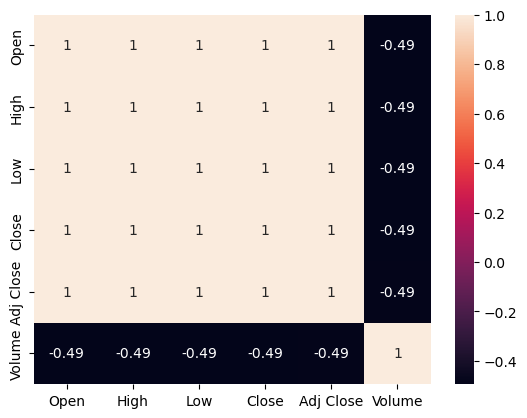

In [11]:
# 6.1.Plotting HeatMap For Correlation

sns.heatmap(Apple.corr(), annot=True)

In [12]:
# 7.Checking for Duplicated for All Rows

Apple.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5280    False
5281    False
5282    False
5283    False
5284    False
Length: 5285, dtype: bool

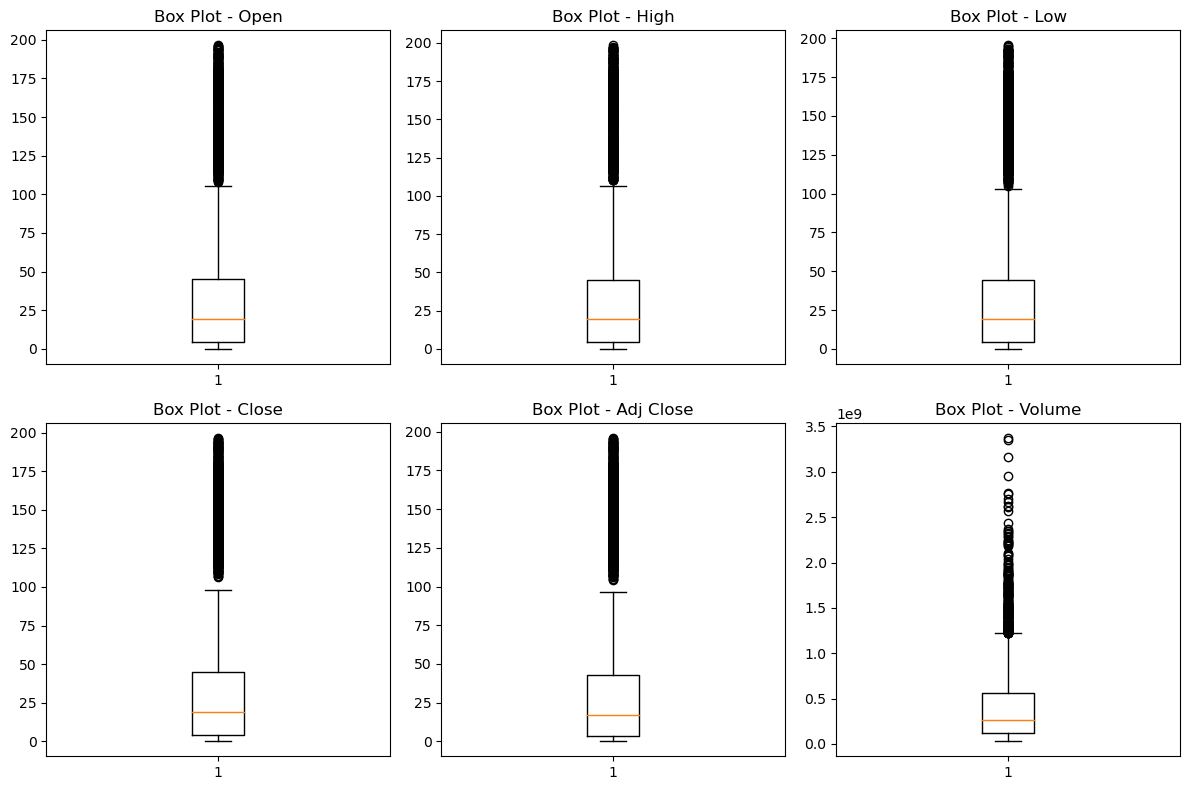

In [13]:
# 8. Finding Outliers for all the features

# Create a box plot for each variable
plt.figure(figsize=(12, 8))

# Box plot for Open
plt.subplot(2, 3, 1)
plt.boxplot(Apple['Open'])
plt.title('Box Plot - Open')

# Box plot for High
plt.subplot(2, 3, 2)
plt.boxplot(Apple['High'])
plt.title('Box Plot - High')

# Box plot for Low
plt.subplot(2, 3, 3)
plt.boxplot(Apple['Low'])
plt.title('Box Plot - Low')

# Box plot for Close
plt.subplot(2, 3, 4)
plt.boxplot(Apple['Close'])
plt.title('Box Plot - Close')

# Box plot for Adj Close
plt.subplot(2, 3, 5)
plt.boxplot(Apple['Adj Close'])
plt.title('Box Plot - Adj Close')

# Box plot for Volume
plt.subplot(2, 3, 6)
plt.boxplot(Apple['Volume'])
plt.title('Box Plot - Volume')

# Adjust layout for better spacing
plt.tight_layout()

# Show the box plots
plt.show()

In [14]:
# Dropping the Columns of "Apple" Dataset.

columns_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
df = Apple.drop(columns=columns_to_drop)
df.head()

Date     Close
0  2002-11-20  0.277321
1  2002-11-21  0.291964
2  2002-11-22  0.285893
3  2002-11-25  0.285179
4  2002-11-26  0.275179

In [15]:
# 9. Treating Outliers

# Dealing with outliers
column_name = 'Close'
outlier_threshold = 1.5
# Calculate the lower and upper bounds for outliers
lower_bound = df[column_name].median() - outlier_threshold * df[column_name].std()
upper_bound = df[column_name].median() + outlier_threshold * df[column_name].std()
# Replace outliers with the maximum value in the column
max_value = df[column_name].max()
df[column_name] = df[column_name].apply(lambda x: max_value if (x < lower_bound) or (x > upper_bound) else x)


print(df)

            Date       Close
0     2002-11-20    0.277321
1     2002-11-21    0.291964
2     2002-11-22    0.285893
3     2002-11-25    0.285179
4     2002-11-26    0.275179
...          ...         ...
5280  2023-11-13  196.449997
5281  2023-11-14  196.449997
5282  2023-11-15  196.449997
5283  2023-11-16  196.449997
5284  2023-11-17  196.449997

[5285 rows x 2 columns]


Text(0.5, 1.0, 'Box Plot - Close')

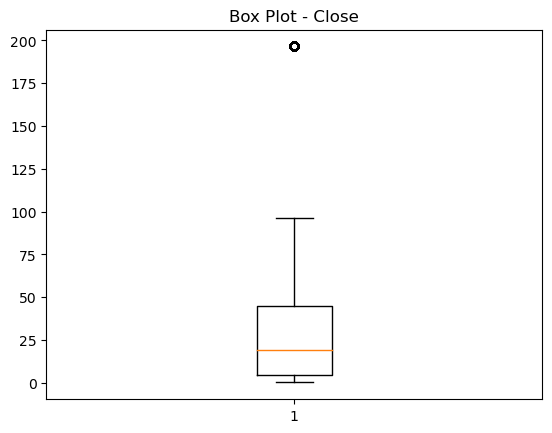

In [16]:
# Plotting the BoxPlot

plt.boxplot(df['Close'])
plt.title('Box Plot - Close')

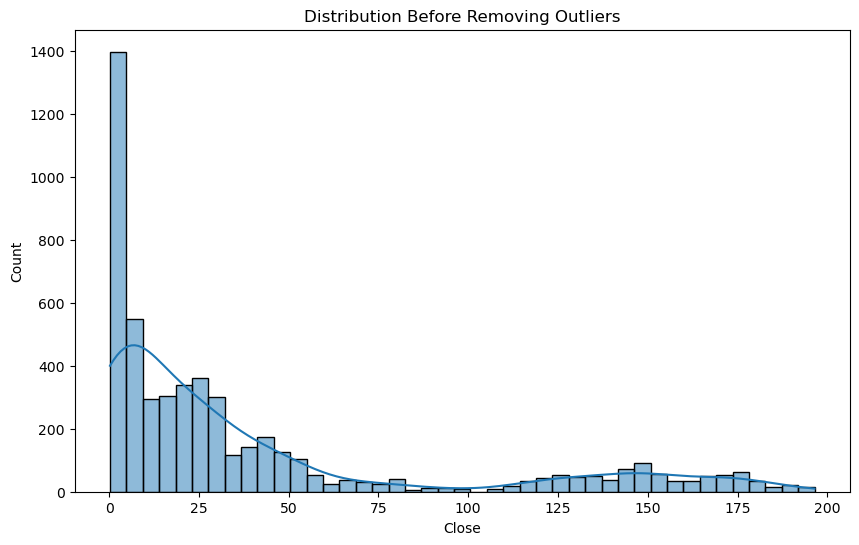

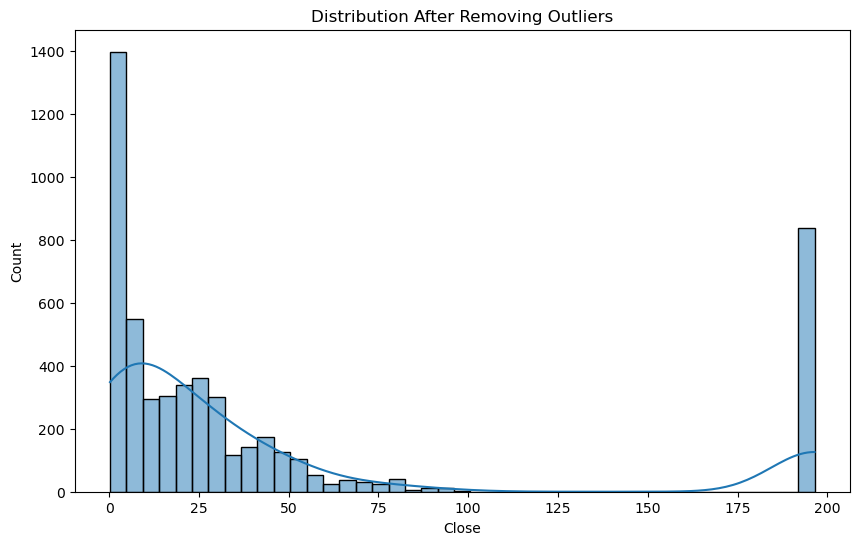

In [17]:
# Plotting Normal Distribution

plt.figure(figsize=(10, 6))
sns.histplot(Apple['Close'], kde=True)
plt.title('Distribution Before Removing Outliers')
plt.show()

# Visualize the distribution after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution After Removing Outliers')
plt.show()

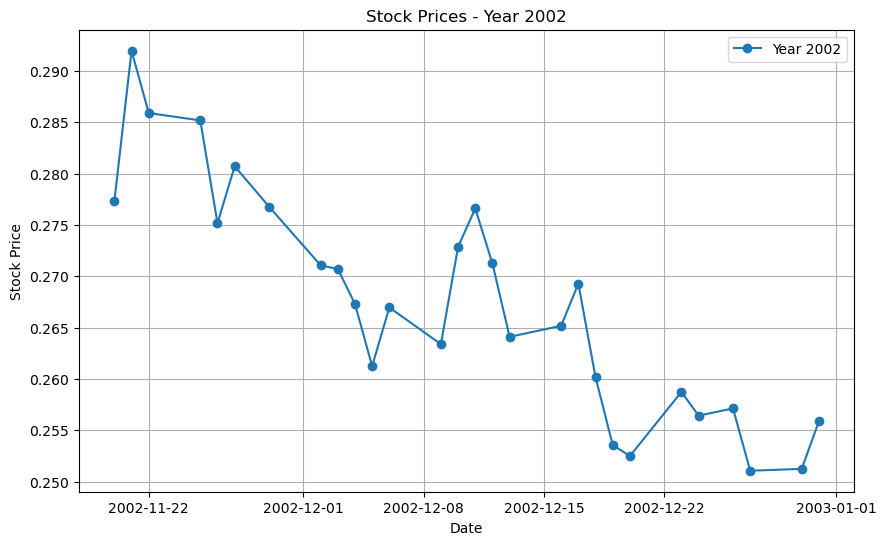

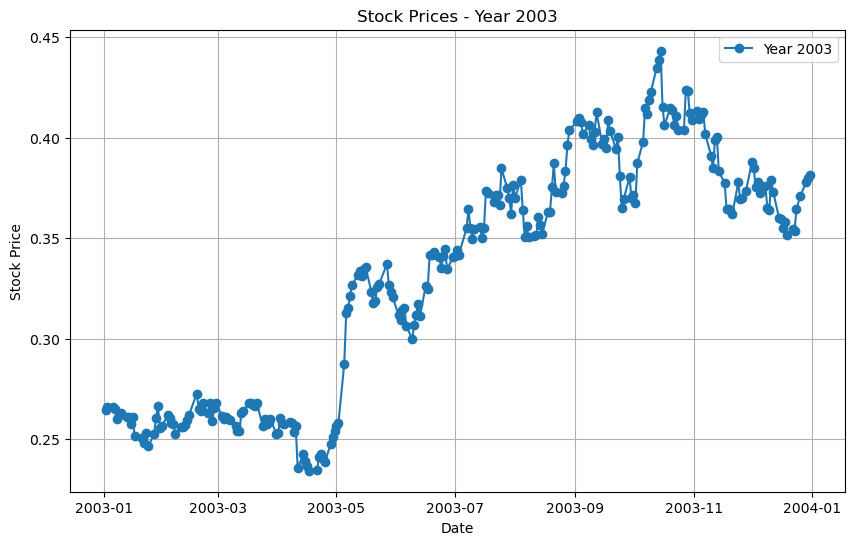

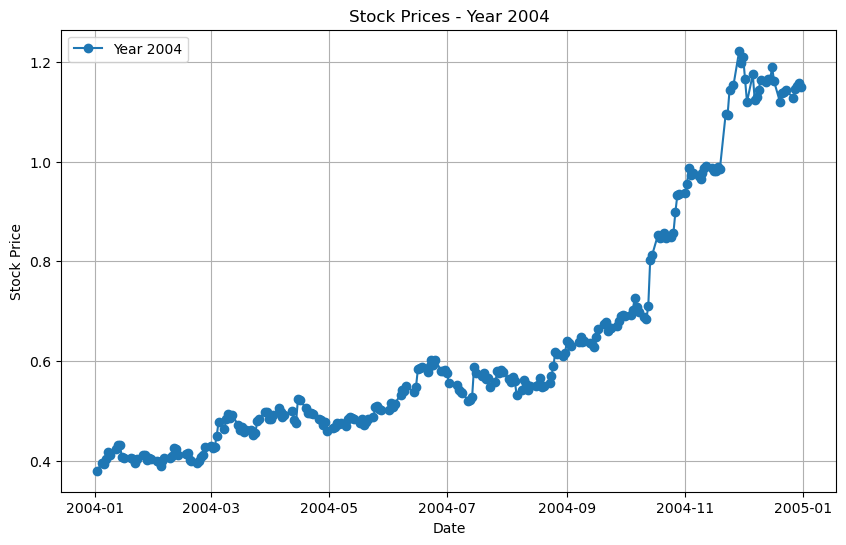

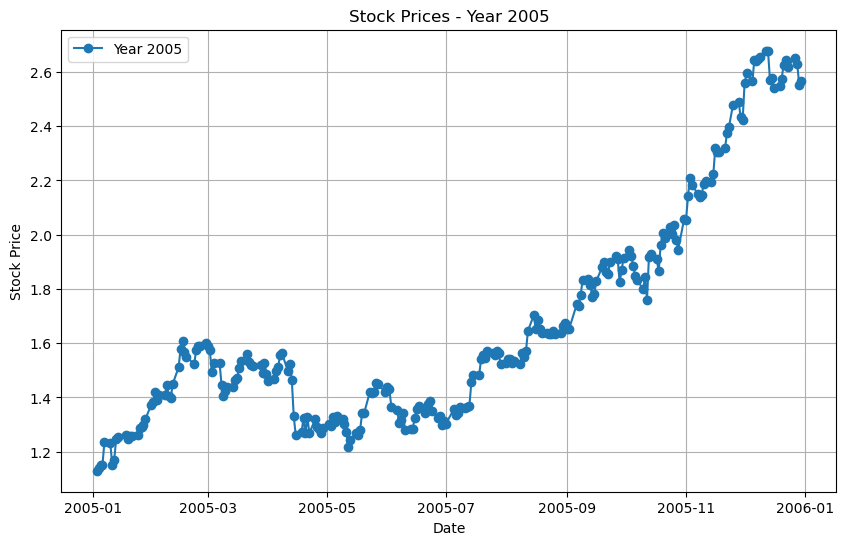

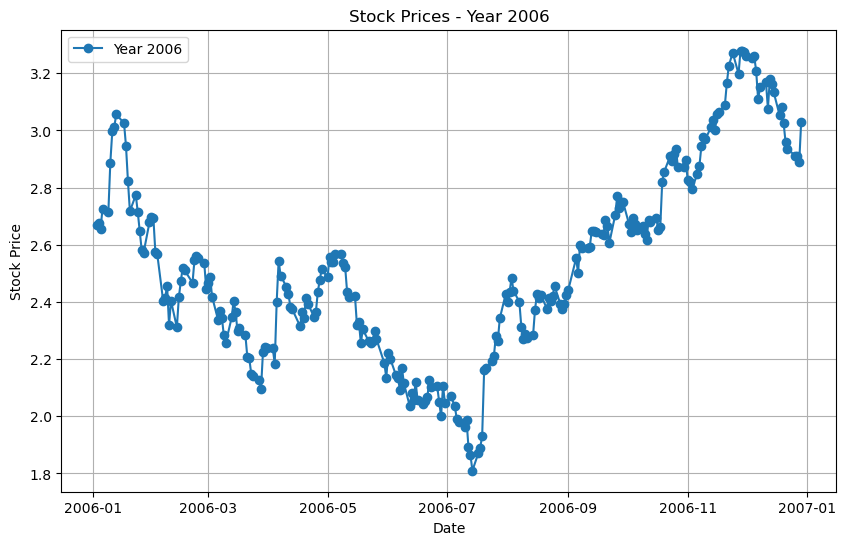

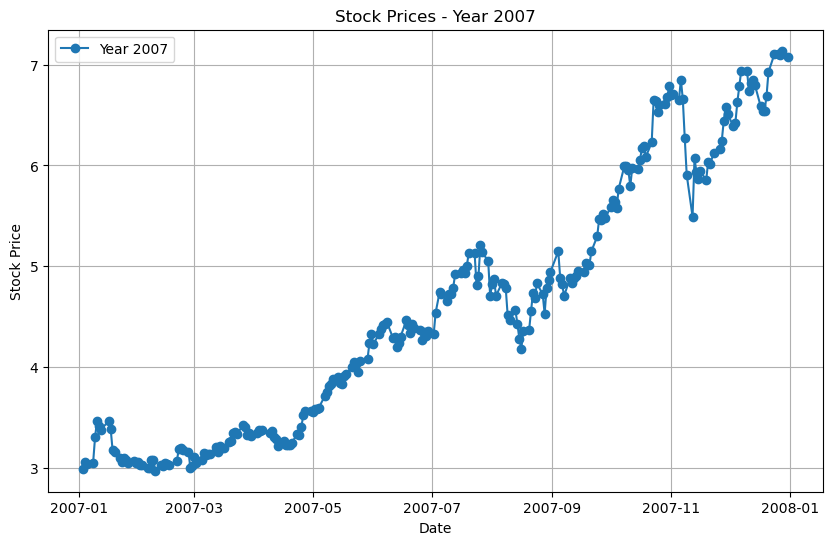

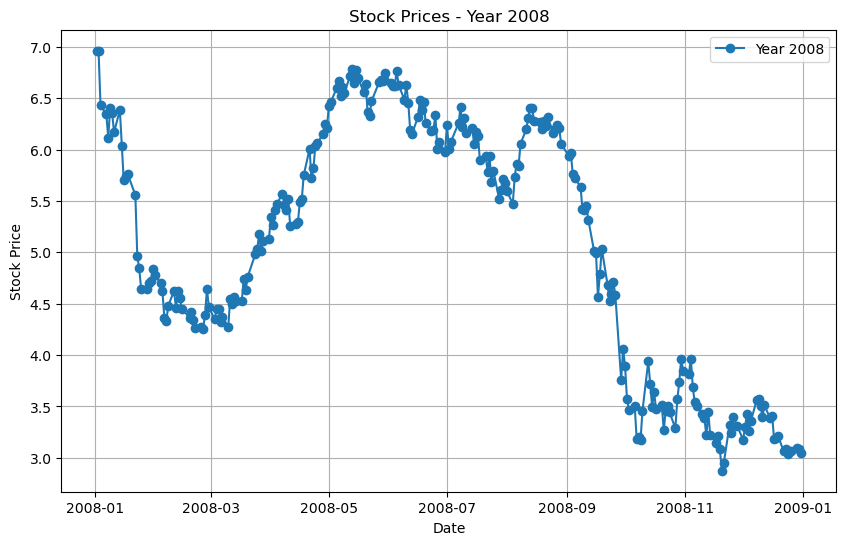

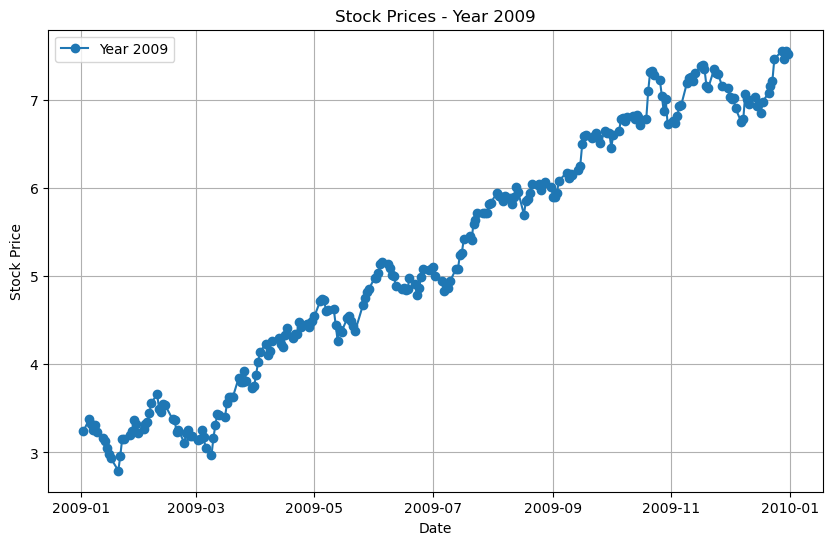

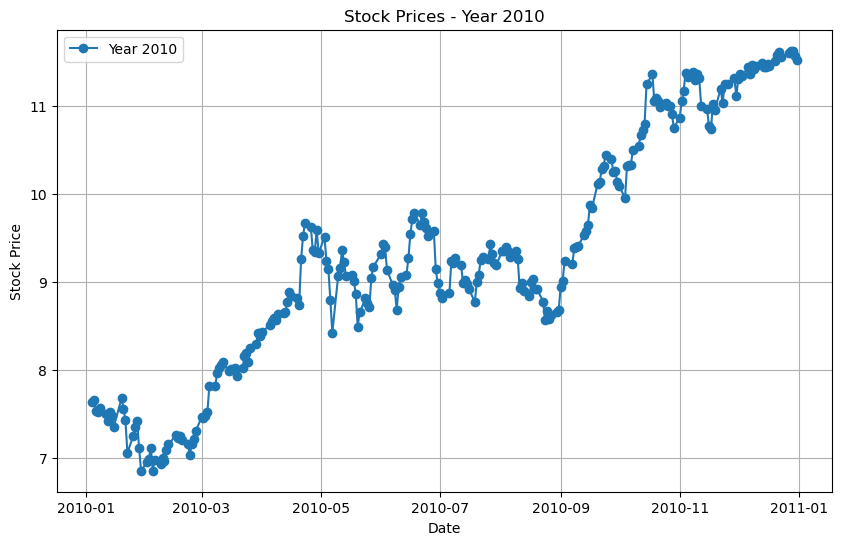

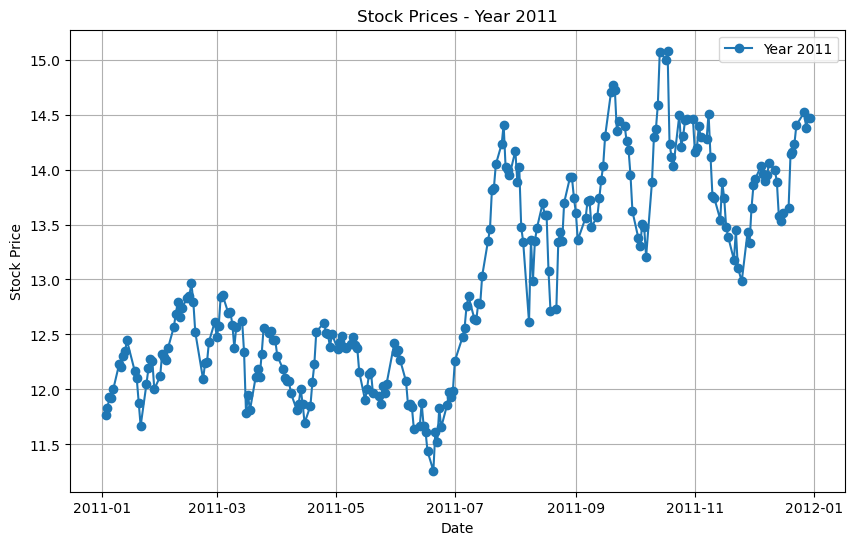

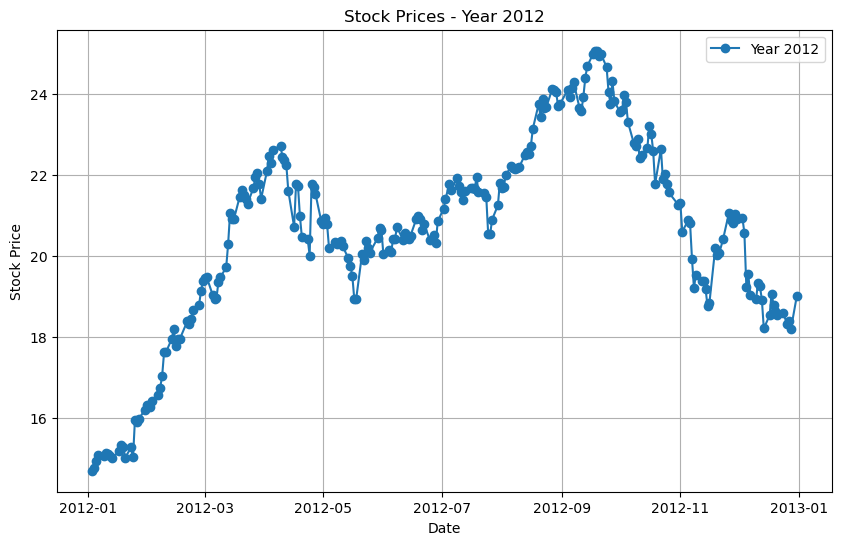

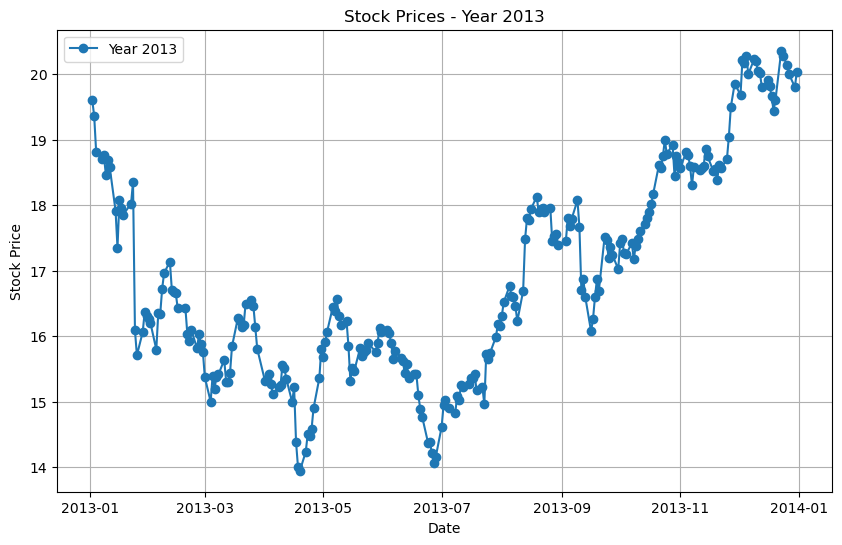

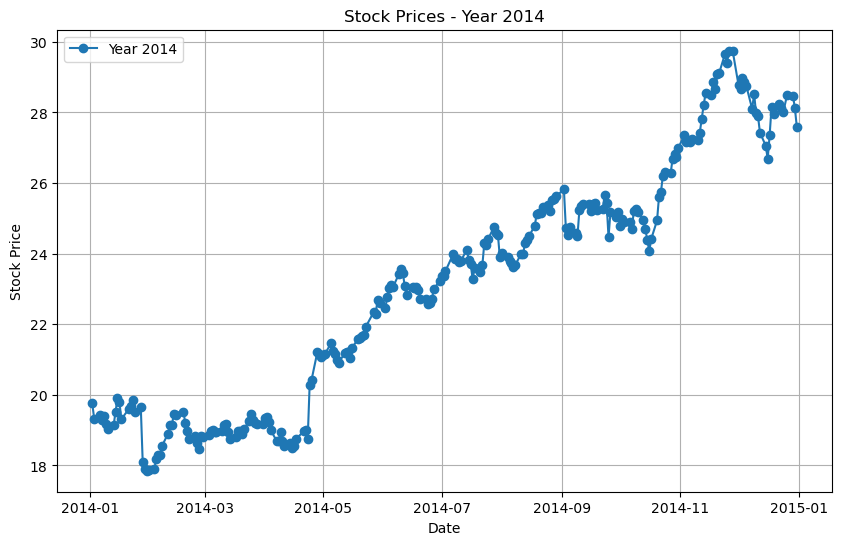

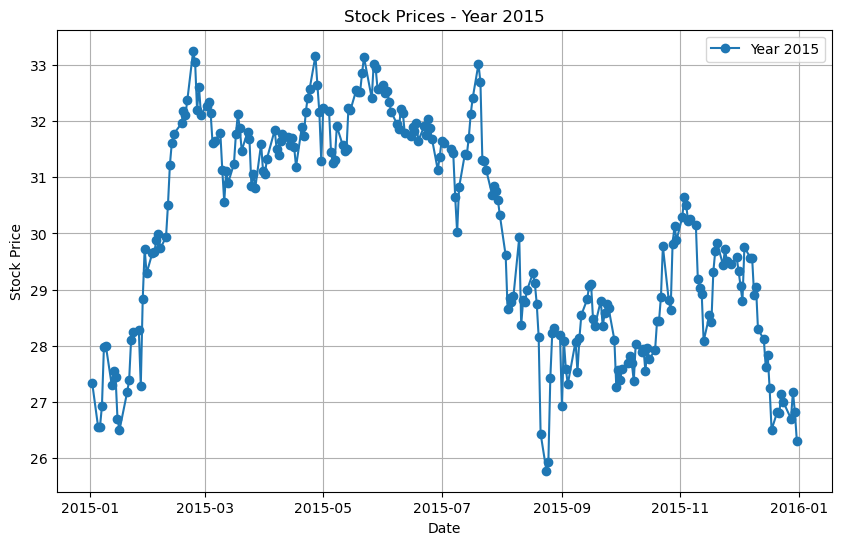

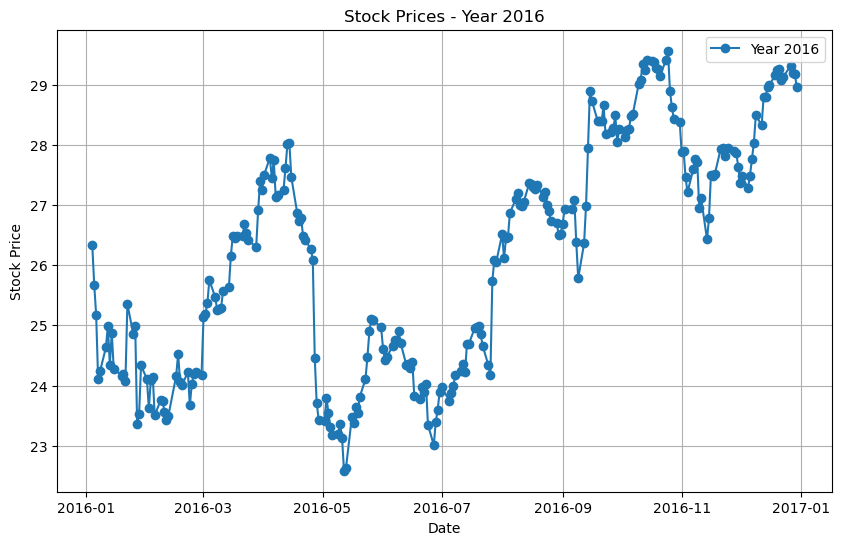

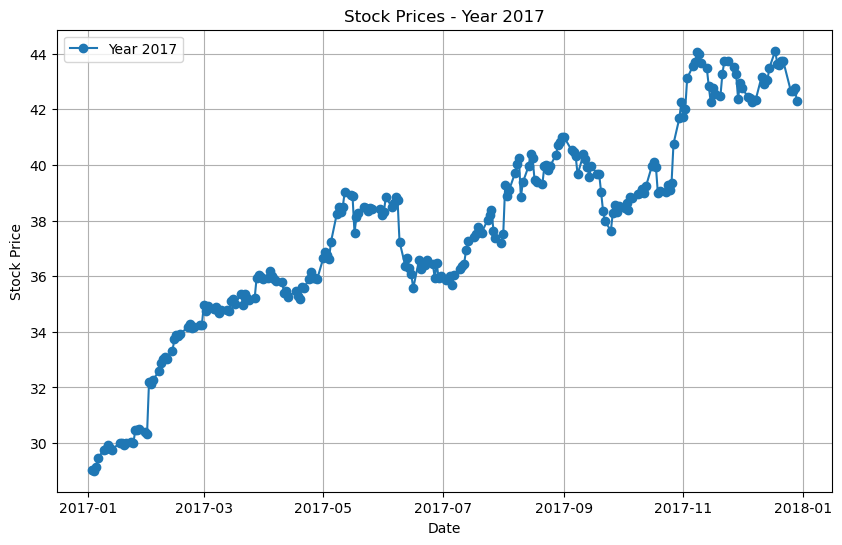

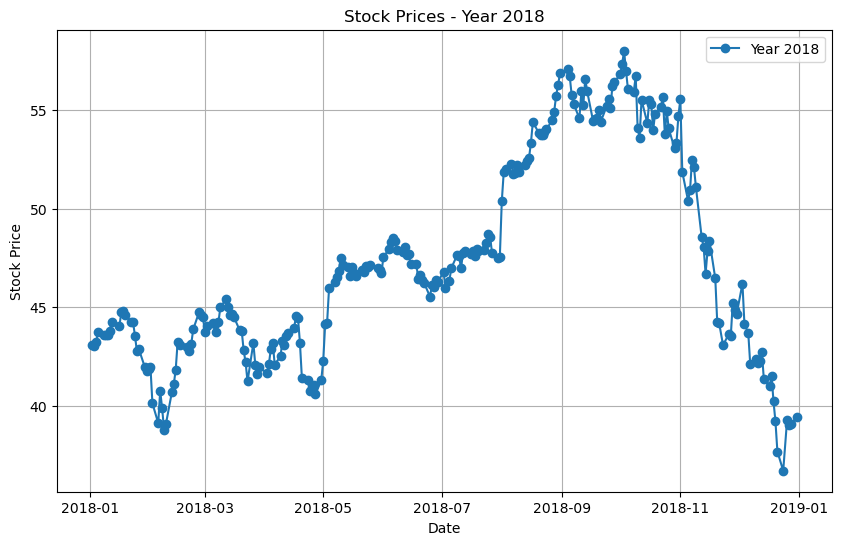

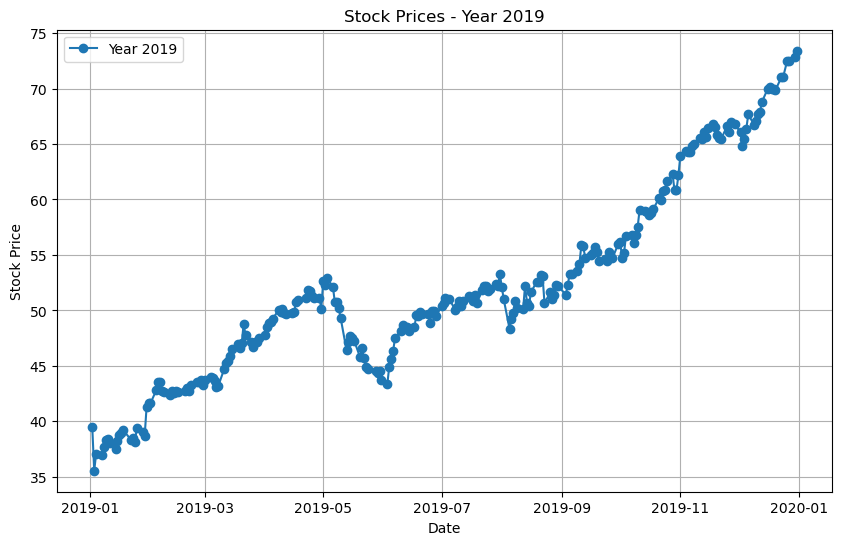

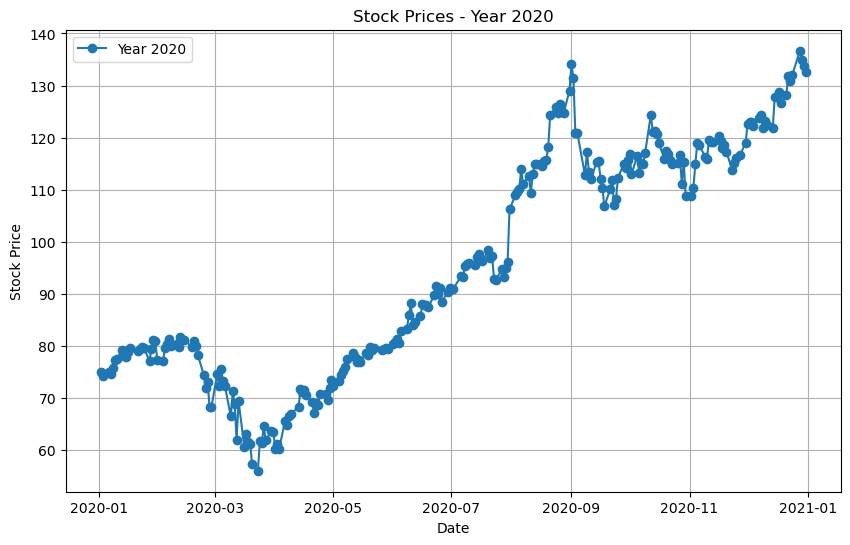

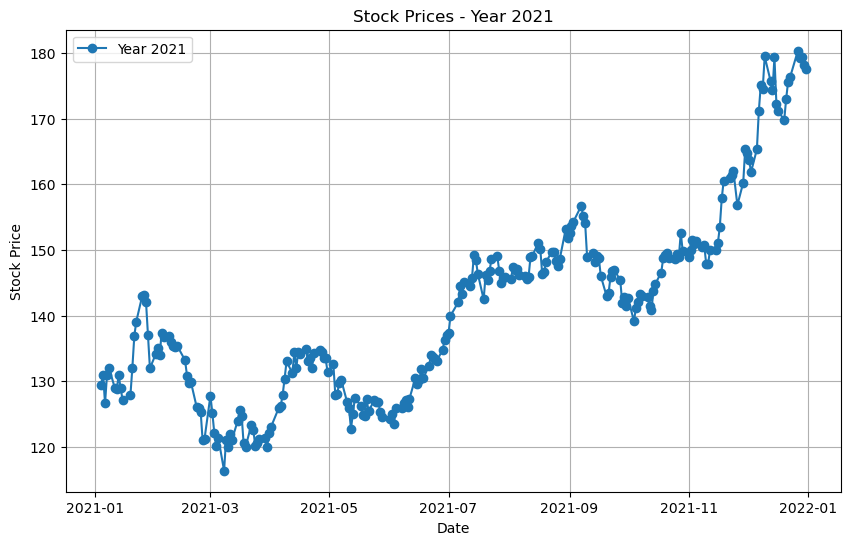

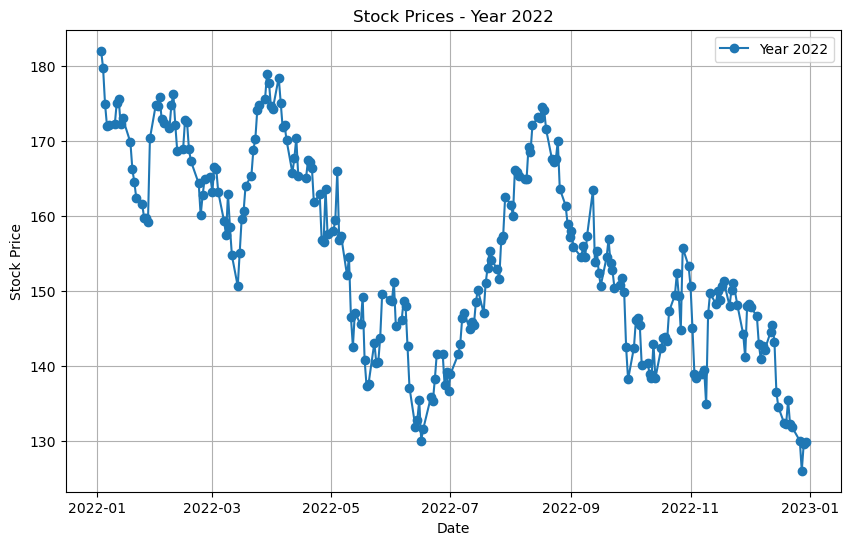

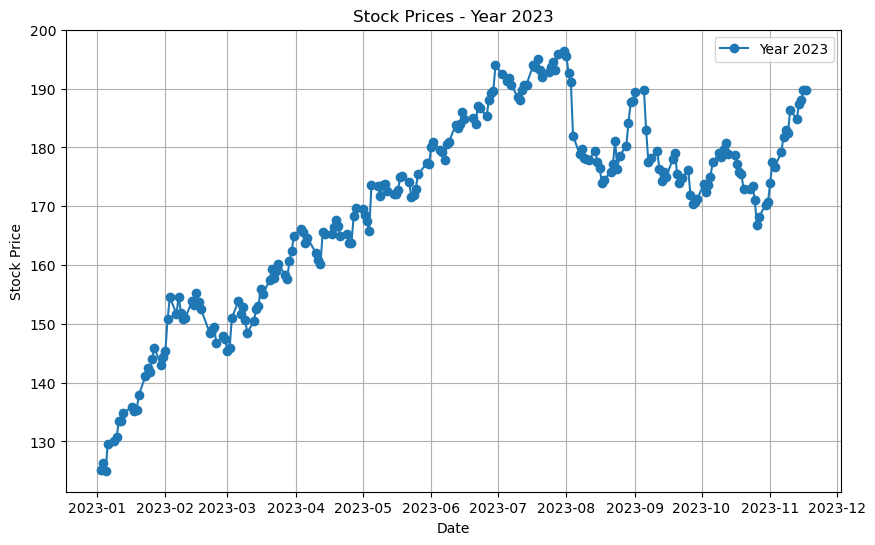

In [18]:
# Plotting of Monthly Graph of Close Column

# Load your stock data
# Assuming your DataFrame is named 'df' and has the columns 'Date' and 'Close'
# If your 'Date' column is not in datetime format, convert it
Apple['Date'] = pd.to_datetime(Apple['Date'])

# Extract the year from the 'Date' column
Apple['Year'] = Apple['Date'].dt.year

# Group by year and calculate the mean of 'Close' for each year
df_yearly = Apple.groupby('Year')['Close'].mean().reset_index()

# Plot a separate graph for each year
for year in df_yearly['Year']:
    plt.figure(figsize=(10, 6))

    # Filter data for the current year
    data_year = Apple[Apple['Year'] == year]

    # Plot the data for the current year
    plt.plot(data_year['Date'], data_year['Close'], marker='o', linestyle='-', label=f'Year {year}')

    plt.title(f'Stock Prices - Year {year}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)


    plt.show()

In [19]:
# Here, the Plotting of the dataset Like "Day Wise", "Month Wise","Yearly Wise" and "WeekDay Wise"

# Spliting the date into Day, Months and Years
# Date-based Feature
Apple['Date'] = pd.to_datetime(Apple['Date'])
Apple['Year'] = Apple['Date'].dt.year
Apple['Month'] = Apple['Date'].dt.month
Apple['Day'] = Apple['Date'].dt.day
Apple['Weekday'] = Apple['Date'].dt.weekday  # Monday is 0, Sunday is 6

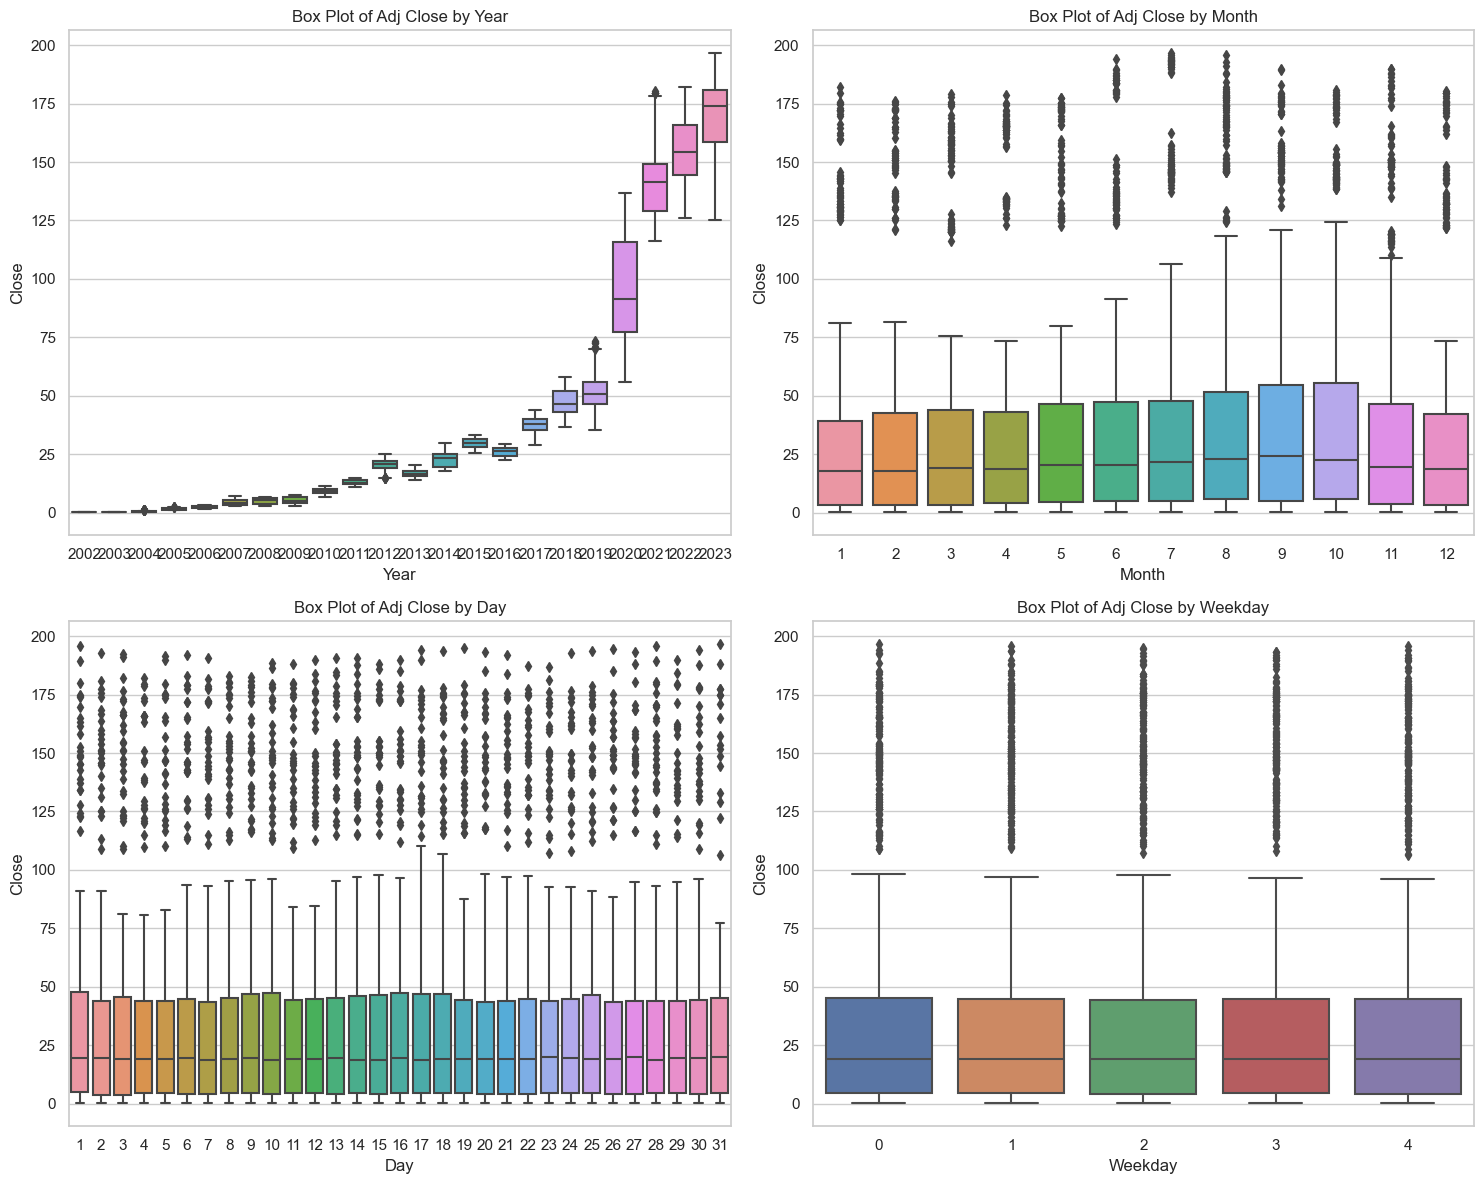

In [20]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Box plot for Year
sns.boxplot(x='Year', y='Close', data=Apple, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Adj Close by Year')

# Box plot for Month
sns.boxplot(x='Month', y='Close', data=Apple, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Adj Close by Month')

# Box plot for Day
sns.boxplot(x='Day', y='Close', data=Apple, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Adj Close by Day')

# Box plot for Weekday
sns.boxplot(x='Weekday', y='Close', data=Apple, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Adj Close by Weekday')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### ACF and PACF plots

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

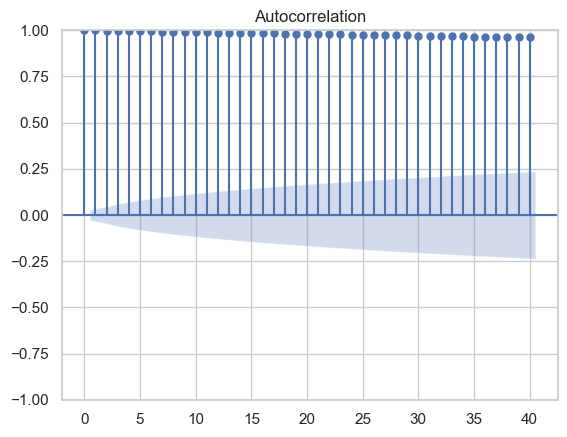

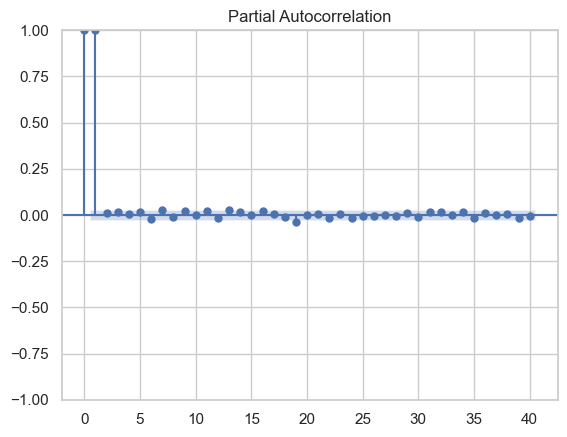

In [22]:
# Plot the ACF
plot_acf(Apple["Close"], lags=40)
title = ('Autocorrelation Function (ACF)')

# Plot the PACF
plot_pacf(Apple["Close"], lags=40)
title = ('Partial Autocorrelation Function (PACF)')

plt.show()

### Model Validation Techniques

In [23]:
# Considering the df["Date"] as x feature and df["Close"] as the y(or) target Variable

df

Date       Close
0     2002-11-20    0.277321
1     2002-11-21    0.291964
2     2002-11-22    0.285893
3     2002-11-25    0.285179
4     2002-11-26    0.275179
...          ...         ...
5280  2023-11-13  196.449997
5281  2023-11-14  196.449997
5282  2023-11-15  196.449997
5283  2023-11-16  196.449997
5284  2023-11-17  196.449997

[5285 rows x 2 columns]

In [24]:
df["Date"]=df["Date"].astype('datetime64')

x = df["Date"]
x

0      2002-11-20
1      2002-11-21
2      2002-11-22
3      2002-11-25
4      2002-11-26
          ...    
5280   2023-11-13
5281   2023-11-14
5282   2023-11-15
5283   2023-11-16
5284   2023-11-17
Name: Date, Length: 5285, dtype: datetime64[ns]

In [25]:
y = df["Close"]
y

0         0.277321
1         0.291964
2         0.285893
3         0.285179
4         0.275179
           ...    
5280    196.449997
5281    196.449997
5282    196.449997
5283    196.449997
5284    196.449997
Name: Close, Length: 5285, dtype: float64

## Buliding Model

#### 1. ARIMA (AutoRegression Integrated Moving Average)

In [26]:
# Copying to df1

df1 = df

In [27]:
df1.set_index('Date', inplace=True)

<Axes: ylabel='Density'>

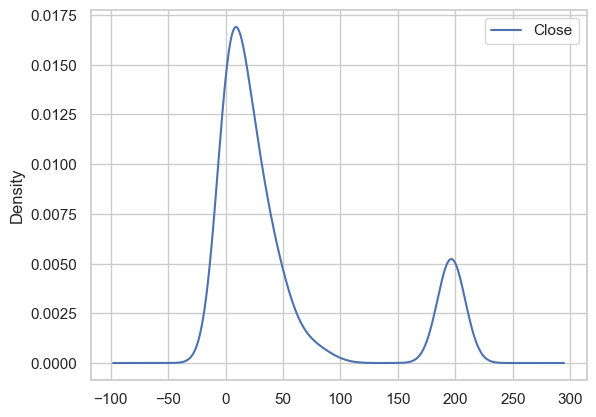

In [28]:
df1.plot(kind='kde')

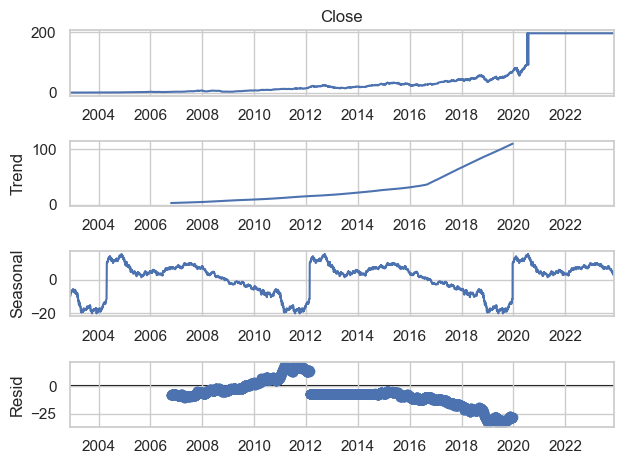

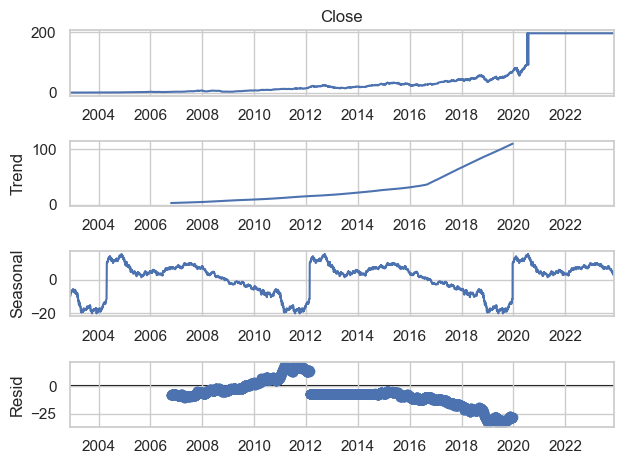

In [29]:
# Seasonal Decompose

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1.Close, period=2002-11-20)
result.plot()

In [30]:
# separate out a validation dataset
split_point = len(df) - 1000
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=True)

print(dataset)
print("\n", validation)

Dataset 4285, Validation 1000
                Close
Date                 
2002-11-20   0.277321
2002-11-21   0.291964
2002-11-22   0.285893
2002-11-25   0.285179
2002-11-26   0.275179
...               ...
2019-11-21  65.502502
2019-11-22  65.445000
2019-11-25  66.592499
2019-11-26  66.072502
2019-11-27  66.959999

[4285 rows x 1 columns]

                  Close
Date                  
2019-11-29   66.812500
2019-12-02   66.040001
2019-12-03   64.862503
2019-12-04   65.434998
2019-12-05   66.394997
...                ...
2023-11-13  196.449997
2023-11-14  196.449997
2023-11-15  196.449997
2023-11-16  196.449997
2023-11-17  196.449997

[1000 rows x 1 columns]


In [31]:
# Augmented Dickey-Fuller (ADF) test  here the ADF is import to check the dataset is stationary or not

from statsmodels.tsa.stattools import adfuller

# Now getting values of df dataset
values=df1.Close.values

# Now passing of the values to adfuller

result=adfuller(values)
result

(-0.13814663607271715,
 0.9455039203273534,
 30,
 5254,
 {'1%': -3.4315952412974227,
  '5%': -2.8620902678554794,
  '10%': -2.56706290724025},
 25021.92438172933)

In [32]:
print('Augmneted Dickey_fuller Statistic: %f' % result[0])
print('p-value: %f'  %result[1])

Augmneted Dickey_fuller Statistic: -0.138147
p-value: 0.945504


In [33]:
# Checking for TimeSeries is Stationary

# printing the critical values at different alpha levels and the result of the test.

print('critical values at different levels:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k, v))
if (result[1] > 0.025):
    print("The time series is non-stationary")

critical values at different levels:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The time series is non-stationary


p value:1.8583722268686422e-14 , de_trended is Stationary


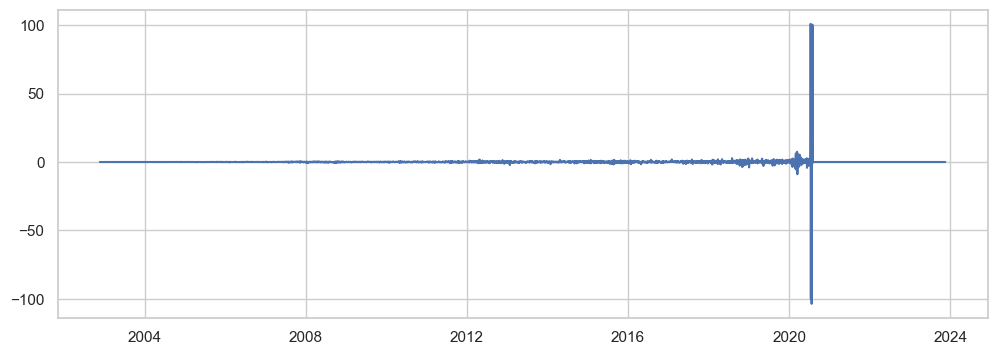

In [34]:
#De-trending with first order differencing

data1 = pd.DataFrame(df["Close"].diff())  # Here, first order Differenation is finding or Lags Values of Close Column.
de_trended = data1.dropna()              # Here, detrending is done by dropping NAN Values
adf2 = adfuller(de_trended.values)[1]
print(f"p value:{adf2}", ", de_trended is Stationary" if adf2 <0.05 else ", df is Non-Stationary")
plt.figure(figsize = (12,4))
plt.plot(de_trended);
plt.show()

Here, the data1 is checked whether the Time Series is Non-Stationary. In Stationary Data there is a constant Mean and Varience for the Data in Time Series for that "WE USE ADF(Augmented Dickey-Fuller)".

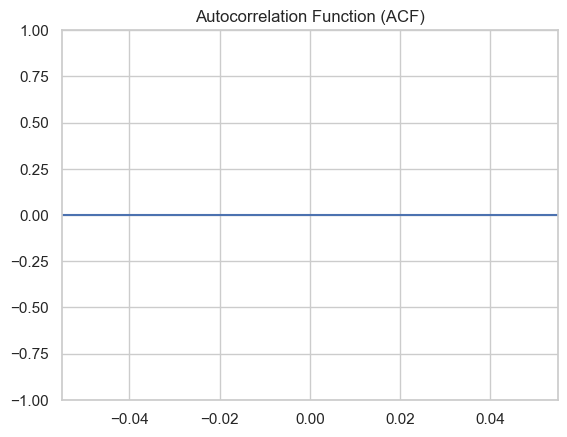

In [35]:
# Plot ACF and PACF to determine the order of AR and MA components
plot_acf(data1, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

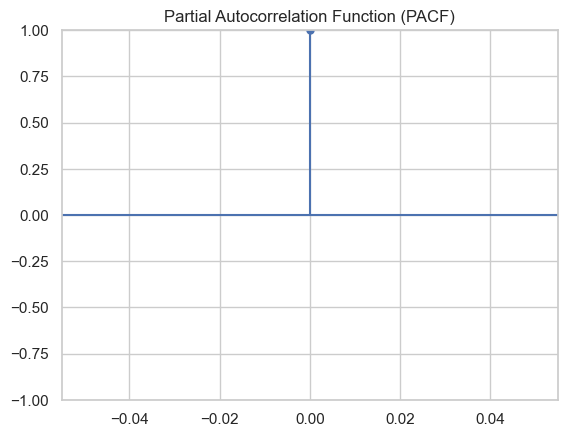

In [36]:
plot_pacf(data1, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

C:\Users\amrut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\amrut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\amrut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



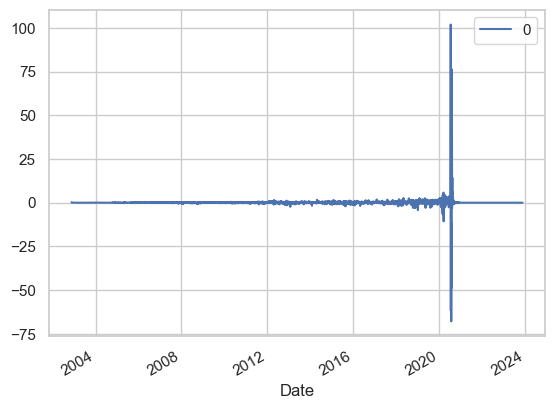

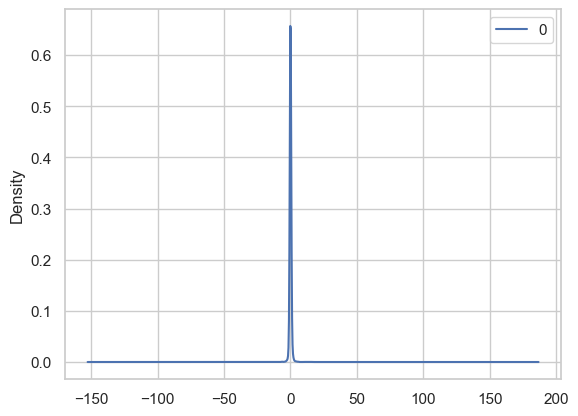

0
count  5285.000000
mean      0.088677
std       2.737642
min     -67.841602
25%      -0.039051
50%       0.002003
75%       0.136020
max     101.901611

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Model Fitting
model = ARIMA(df1['Close'], order=(5,1,4))
model_fit = model.fit()

# Residual Analysis
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

residuals.describe()

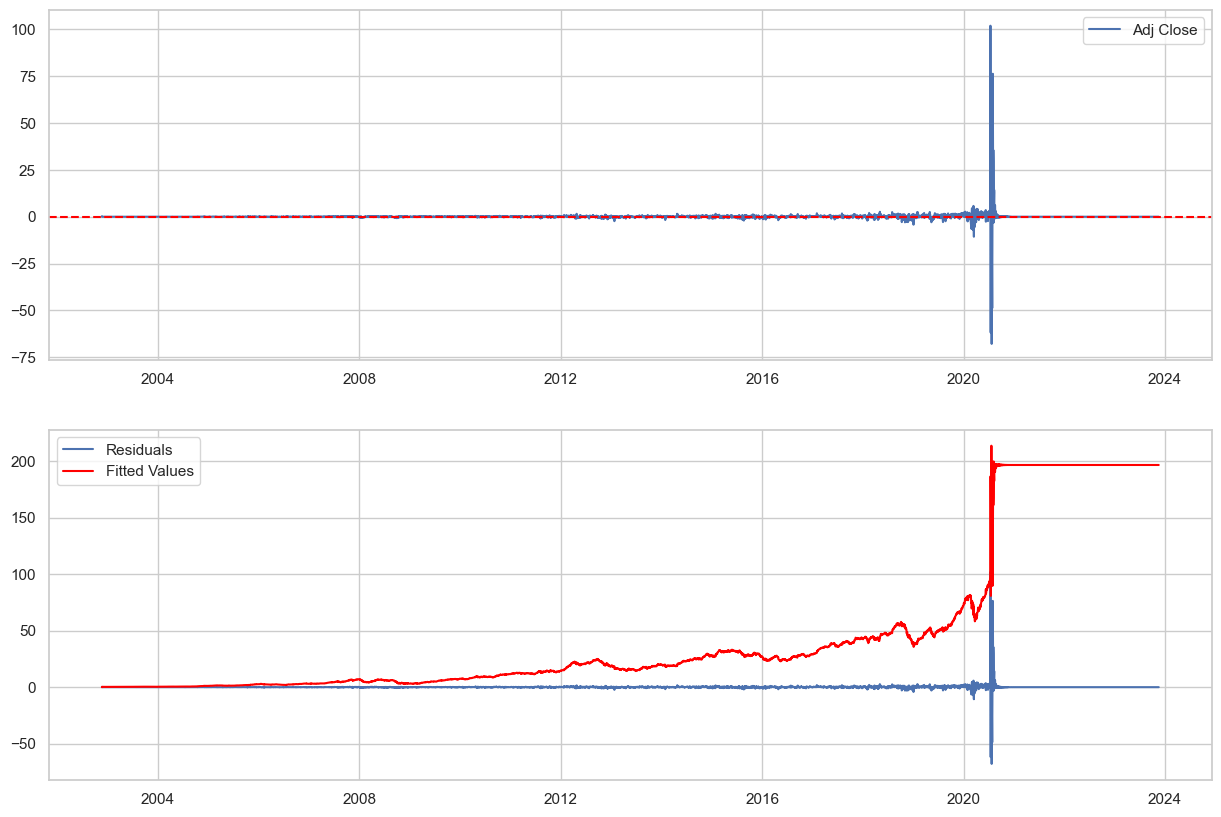

In [38]:
# Calculate residual plots
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(residuals, label='Adj Close')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.legend(loc='best')

ax2.plot(residuals.index, residuals, label='Residuals')
ax2.plot(residuals.index, model_fit.fittedvalues, color='red', label='Fitted Values')
ax2.legend(loc='best')

C:\Users\amrut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



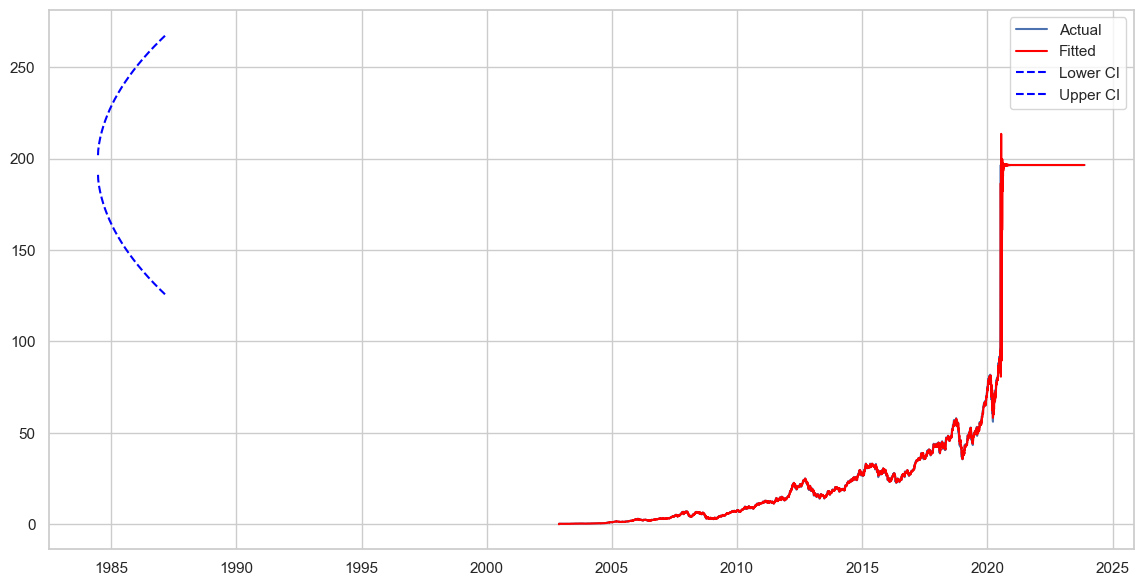

In [39]:
# Forecasting
forecast = model_fit.get_forecast(steps=1000)
forecast_ci = forecast.conf_int()

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(df1['Close'], label='Actual')
ax.plot(model_fit.fittedvalues, color='red', label='Fitted')
ax.plot(forecast_ci.iloc[:, 0], color='blue', linestyle='--', label='Lower CI')
ax.plot(forecast_ci.iloc[:, 1], color='blue', linestyle='--', label='Upper CI')
ax.legend(loc='best')

plt.show()

In [40]:
# RMSE, MAPE
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

rmse = np.sqrt(mean_squared_error(df1['Close'], model_fit.fittedvalues))
print('Root Mean Squared Error: ', rmse)

scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(df1['Close'].values.reshape(-1, 1))
model_fit_scaled = scaler.fit_transform(model_fit.fittedvalues.values.reshape(-1, 1))

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_error(data_train_scaled, model_fit_scaled)
print('Mean Absolute Percentage Error: ', mape)

Root Mean Squared Error:  2.7388186746926952
Mean Absolute Percentage Error:  0.006195892751905614


#### 2. LSTM (Long Short Term Memory Cell)

In [41]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extract the time series data
data = df1['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Define the sequence length (number of time steps to look back)
seq_length = 10

# Create sequences for training
sequences = create_sequences(data_scaled, seq_length)

# Split the data into training and testing sets
train_size = int(len(sequences) * 0.8)
train, test = sequences[:train_size], sequences[train_size:]

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Invert the scaling to get the actual stock prices
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
132/132 [==============================] - 3s 5ms/step - loss: 8.6101e-04
Epoch 2/50
132/132 [==============================] - 1s 5ms/step - loss: 1.5036e-05
Epoch 3/50
132/132 [==============================] - 1s 5ms/step - loss: 1.3545e-05
Epoch 4/50
132/132 [==============================] - 1s 5ms/step - loss: 1.3416e-05
Epoch 5/50
132/132 [==============================] - 1s 5ms/step - loss: 1.2985e-05
Epoch 6/50
132/132 [==============================] - 1s 5ms/step - loss: 1.2958e-05
Epoch 7/50
132/132 [==============================] - 1s 5ms/step - loss: 1.2773e-05
Epoch 8/50
132/132 [==============================] - 1s 5ms/step - loss: 1.2720e-05
Epoch 9/50
132/132 [==============================] - 1s 4ms/step - loss: 1.3133e-05
Epoch 10/50
132/132 [==============================] - 1s 5ms/step - loss: 1.1914e-05
Epoch 11/50
132/132 [==============================] - 1s 5ms/step - loss: 1.2352e-05
Epoch 12/50
132/132 [==============================] - 1s 5ms/s

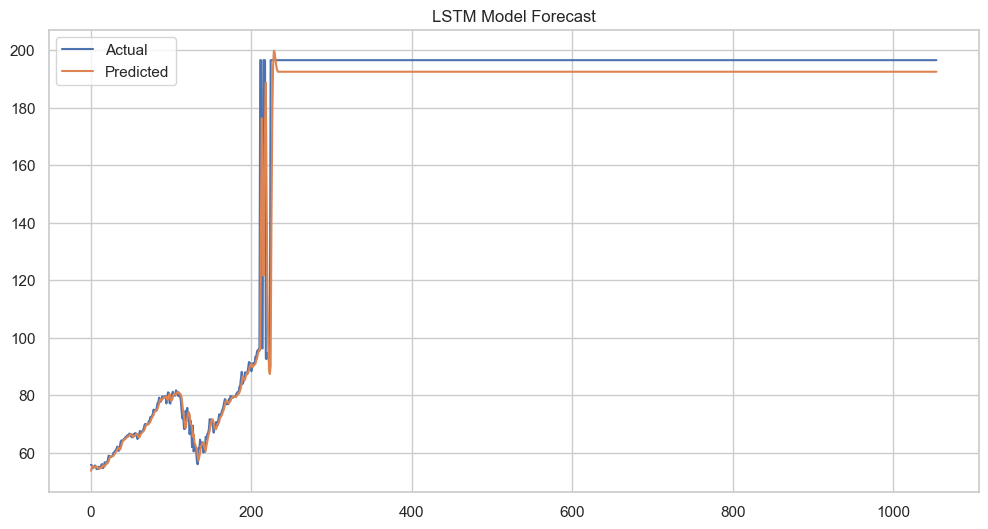

In [42]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.legend()
plt.title('LSTM Model Forecast')
plt.show()

In [43]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
print("Root Mean Squared Error:", rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_inv - predictions_inv) / y_test_inv)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error: 8.264704152750246
Mean Absolute Percentage Error (MAPE): 2.5228892555746665


#### 3. Linear Regression

In [44]:
train = df1.head(2642)
test = df1.iloc[2643:]

In [45]:
# Importing Linear Regression

from sklearn.linear_model import LinearRegression

# Initial the Linear Regression

lm=LinearRegression()

# Fitting of the X_train and Y_train Variables

lm.fit(train,test)

# Prediction of Linear Regression is Done

y_predict_train=lm.predict(train)
y_predict_train

array([[ 21.14921836],
       [ 21.30447241],
       [ 21.24010395],
       ...,
       [182.26916635],
       [185.93086335],
       [184.69262666]])

In [46]:
# Now, Prediction on the X_test

y_predict_test=lm.predict(test)
y_predict_test

array([[ 185.63171064],
       [ 186.77149147],
       [ 185.36664533],
       ...,
       [2101.09205655],
       [2101.09205655],
       [2101.09205655]])

In [47]:
# Importing MSE
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse =sqrt(mean_squared_error(test,y_predict_test))
rmse


1125.103524639574

In [48]:
# Importing r2_Score

from sklearn.metrics import r2_score
score = r2_score(test,y_predict_test)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -22304.0%


#### 4. SARIMA

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (5, 1, 4)
seasonal_order = (5, 1, 4, 12)

model = SARIMAX(df1['Close'], order=order, seasonal_order=seasonal_order)
results = model.fit()

C:\Users\amrut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\amrut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\amrut\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [50]:
forecast_steps = 1000  # Adjust the number of steps as needed
forecast = results.get_forecast(steps=forecast_steps)

C:\Users\amrut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [51]:
# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_values

5285    196.442021
5286    196.644210
5287    196.515511
5288    196.512829
5289    196.487279
           ...    
6280    243.598392
6281    243.620800
6282    243.662502
6283    243.352173
6284    243.347161
Name: predicted_mean, Length: 1000, dtype: float64

In [52]:
# Get the index of the forecast values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq=df.index.freq)


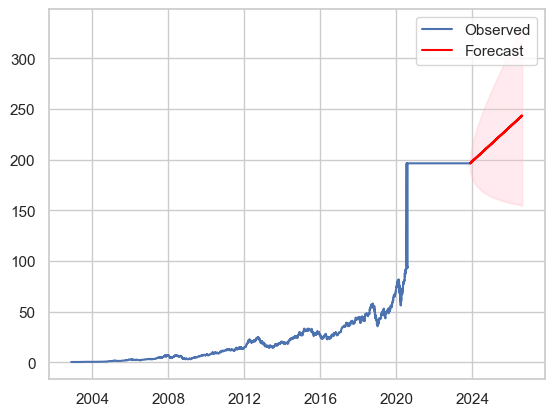

In [53]:
# Plotting Graph

plt.plot(df['Close'], label='Observed')
plt.plot(forecast_index[1:], forecast_values, label='Forecast', color='red')  # Use [1:] to exclude the initial point
plt.fill_between(forecast_index[1:], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

val=pd.read_csv('validation.csv')

mae = mean_absolute_error(val.Close, forecast_values)
mse = mean_squared_error(val.Close, forecast_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 43.108595066556646
Mean Squared Error (MSE): 3246.0798653626116
Root Mean Squared Error (RMSE): 56.97437902568673


#### 5. FbProphet

In [55]:
from prophet import Prophet

columns_to_drop1 = ["Open", "High", "Low", "Adj Close", "Volume", "Year", "Month", "Day", "Weekday"]
df2 = Apple.drop(columns=columns_to_drop1)
df2

df2.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [56]:
# Create a Prophet object and fit it to the data
model = Prophet()
model.fit(df2)

09:15:10 - cmdstanpy - INFO - Chain [1] start processing
09:15:12 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
# Create a future dataframe
future = model.make_future_dataframe(periods=365)
future.tail()

ds
5645 2024-11-12
5646 2024-11-13
5647 2024-11-14
5648 2024-11-15
5649 2024-11-16

In [58]:
# Make predictions for the future dates
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
5645 2024-11-12  223.308864  212.107136  234.614849
5646 2024-11-13  223.480242  212.089878  234.543776
5647 2024-11-14  223.578827  212.263758  235.190962
5648 2024-11-15  223.609191  212.904162  234.055283
5649 2024-11-16  224.334968  213.673792  234.924247

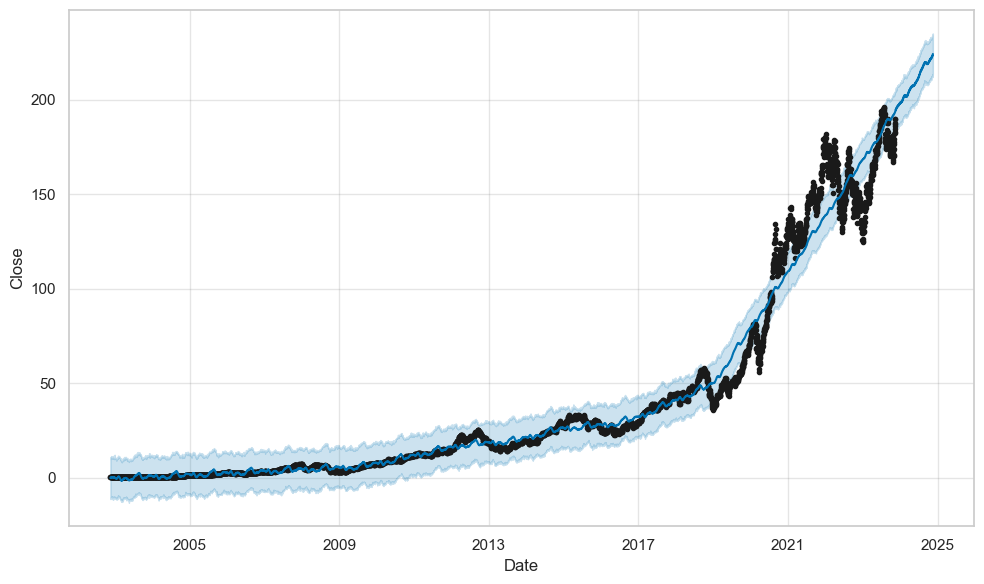

In [59]:
# Visualize the predictions
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['Close'].values
y_pred = forecast['yhat'][-len(test):].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 21.98284443175311
MSE: 824.4957711887373
RMSE: 28.714034394155366


Deployment

In [61]:
# Convert the time series data to supervised learning
time_steps = 10  # You can adjust this parameter based on your data
X, y = prepare_data(df[['y']].values, time_steps)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)

# Date input from the user
date_input = st.date_input("Enter a date for forecasting:", pd.to_datetime('today'))

# Prepare data for forecasting
last_data = df['y'].values[-time_steps:]
last_data = scaler.transform(last_data.reshape(-1, 1))
last_data = np.reshape(last_data, (1, time_steps, 1))

# Forecast
forecast = model.predict(last_data)
forecast = scaler.inverse_transform(forecast)[0, 0]

# Display the forecast
st.write('Forecast:')
st.write(forecast)